In [4]:
import pandas as pd
df_numeric=pd.read_csv('Data/book_cleaned.csv')

In [5]:
df_numeric

,Publishing Year,language_code,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,units sold,publisher_code,author_rating
0,1975.0,0.0,3.42,155903,0,34160.00,20496.000,4.88,1,7000,3,3
1,1987.0,0.0,4.23,145267,0,12437.50,7462.500,1.99,2,6250,3,2
2,2015.0,0.0,3.31,138669,0,47795.00,28677.000,8.69,3,5500,0,3
3,2008.0,0.0,4.04,150898,0,41250.00,24750.000,7.50,3,5500,1,2
4,2011.0,0.0,4.04,198283,0,37952.50,22771.500,7.99,4,4750,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2014.0,0.0,3.52,37379,1,104.94,62.964,0.99,1268,106,0,2
1066,1989.0,0.0,4.34,57312,0,846.94,508.164,7.99,1270,106,7,0
1067,1930.0,0.0,3.92,58742,0,846.94,508.164,7.99,1271,106,1,2
1068,2011.0,0.0,4.17,58028,0,104.94,62.964,0.99,1272,106,0,0


### Probamos random forest

MAE: 12877.69
RMSE: 17052.38
R²: 0.726


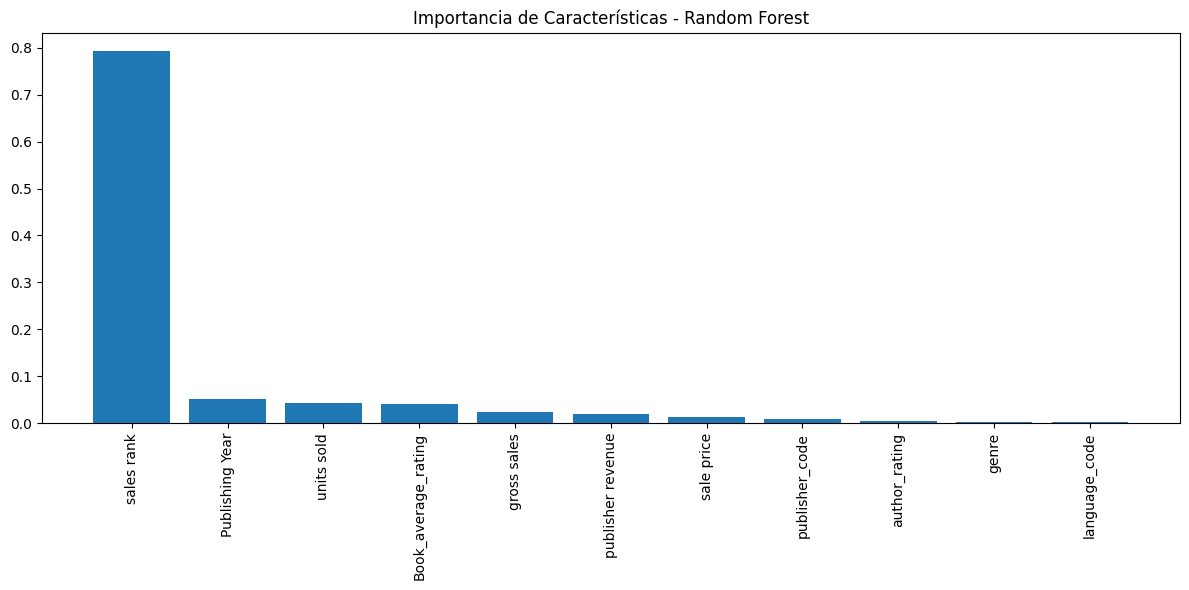

In [6]:
# =========================
# 1. IMPORTAR LIBRERÍAS
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# =========================
# 2. DEFINIR X e y
# =========================
# Asegúrate de que df_numeric está definido
X = df_numeric.drop(columns=["Book_ratings_count"])
y = df_numeric["Book_ratings_count"]

# =========================
# 3. LIMPIEZA
# =========================
X = X.dropna()
y = y.loc[X.index]

# =========================
# 4. DIVISIÓN TRAIN/TEST
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 5. ENTRENAMIENTO Random Forest
# =========================
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# =========================
# 6. PREDICCIÓN Y MÉTRICAS
# =========================
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# =========================
# 7. IMPORTANCIA DE FEATURES
# =========================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### Probamos Linear Regression

MAE: 14229.06
RMSE: 19386.01
R²: 0.646


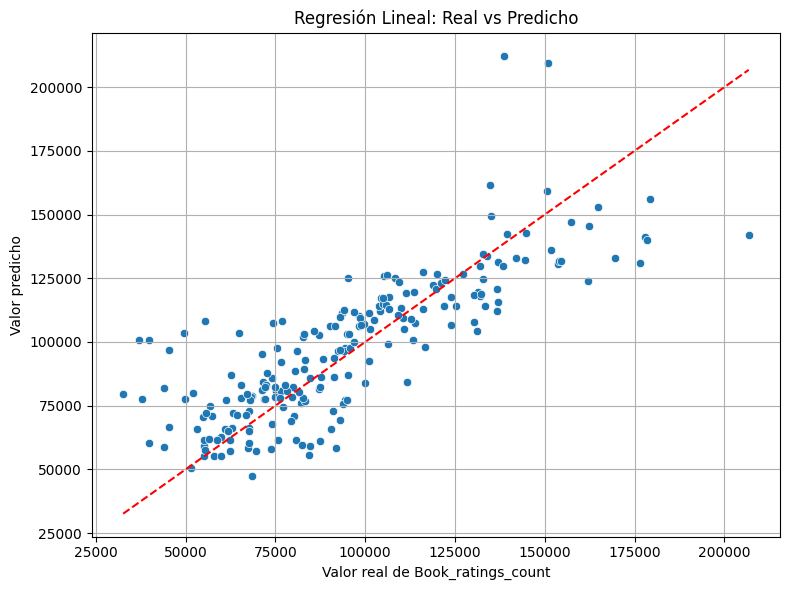

In [8]:
# =========================
# 1. IMPORTAR LIBRERÍAS
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 2. DEFINIR X e y (EXCLUIMOS Book_ratings_count del input)
# =========================
X = df_numeric.drop(columns=["Book_ratings_count"])
y = df_numeric["Book_ratings_count"]

# =========================
# 3. LIMPIEZA DE DATOS
# =========================
X = X.dropna()
y = y.loc[X.index]

# =========================
# 4. DIVISIÓN TRAIN/TEST
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 5. ENTRENAMIENTO REGRESIÓN LINEAL
# =========================
lr = LinearRegression()
lr.fit(X_train, y_train)

# =========================
# 6. EVALUACIÓN
# =========================
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")



plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valor real de Book_ratings_count")
plt.ylabel("Valor predicho")
plt.title("Regresión Lineal: Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()



### Y finalmente con deep NN

In [13]:
# =========================
# 1. IMPORTAR LIBRERÍAS
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# =========================
# 2. PREPARAR X e y (SIN log1p)
# =========================
X = df_numeric.drop(columns=["Book_ratings_count"])
y = df_numeric["Book_ratings_count"]

X = X.dropna()
y = y.loc[X.index]

# =========================
# 3. ESCALAR X
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# 4. TRAIN / TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =========================
# 5. DEFINIR RED NEURONAL MÁS PROFUNDA
# =========================
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# =========================
# 6. ENTRENAMIENTO
# =========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# =========================
# 7. EVALUACIÓN FINAL
# =========================
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


Epoch 1/150


/home/sebastian/miniconda3/envs/proy_miner/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9995763712.0000 - mae: 95043.5547 - val_loss: 10387917824.0000 - val_mae: 96105.1641
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10217803776.0000 - mae: 96304.2500 - val_loss: 10385183744.0000 - val_mae: 96091.5469
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9726224384.0000 - mae: 93528.5469 - val_loss: 10376538112.0000 - val_mae: 96048.9219
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10076082176.0000 - mae: 95421.6406 - val_loss: 10353486848.0000 - val_mae: 95936.8828
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9889228800.0000 - mae: 94568.9531 - val_loss: 10300593152.0000 - val_mae: 95682.1484
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9470860288.0000 - mae: 92433.0625 - val_loss: 10195159040.0000 - val_mae: 95178.2812
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9366379520.0000 - mae: 92176.5703 - val_loss: 10008192000.0000 - val_mae: 94282.2578
Ep

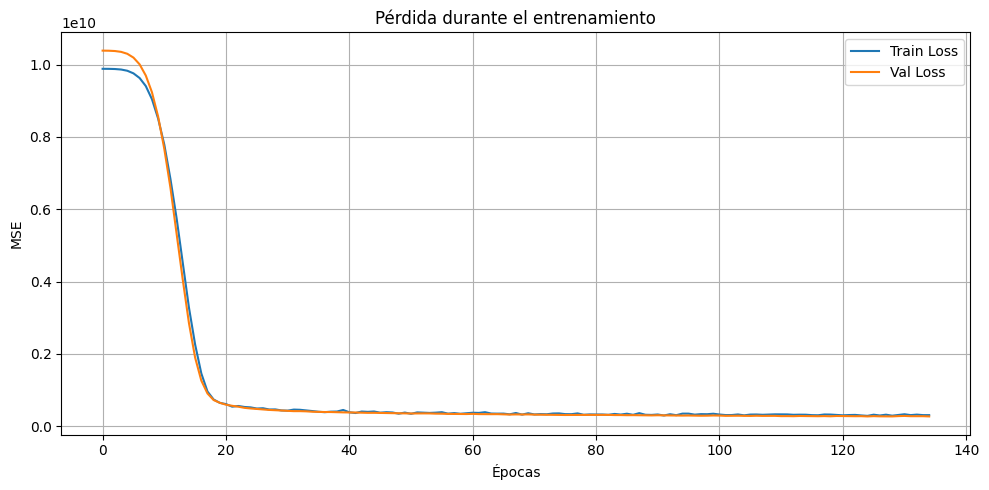

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


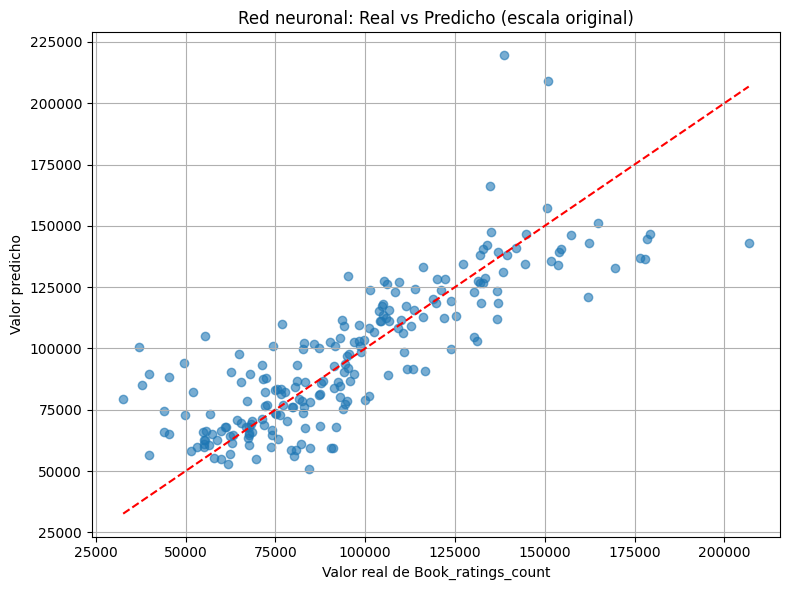

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real de Book_ratings_count")
plt.ylabel("Valor predicho")
plt.title("Red neuronal: Real vs Predicho (escala original)")
plt.grid(True)
plt.tight_layout()
plt.show()


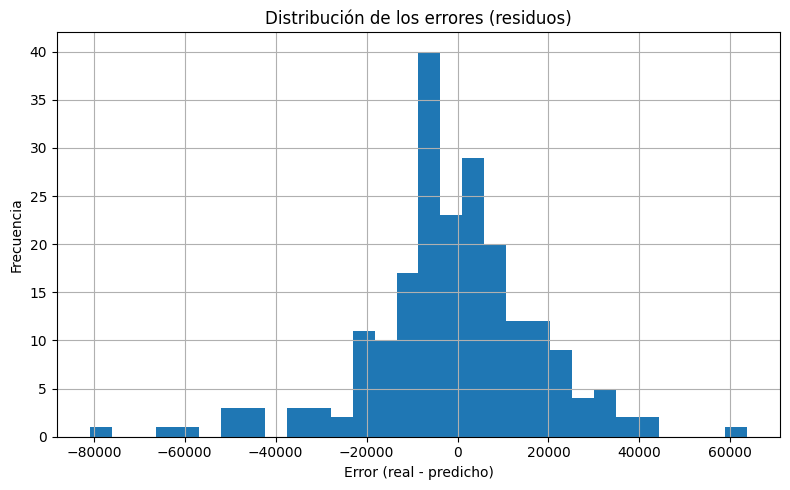

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30)
plt.title("Distribución de los errores (residuos)")
plt.xlabel("Error (real - predicho)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


### Hacemos la prueba con el libro nuevo con el modelo mejor valorado